In [ ]:
#loading dependecies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading dataset
df = pd.read_csv(r"C:\Users\Adebayo\Downloads\Online Retail.csv")

In [ ]:
#data view
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Counting NA value for each columns
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#Checking data types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
#Statisticaly overview of the dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Data Cleaning

In [ ]:
#Droping the NA values from the CustomerID column. This is removed because customer is the main features for cohort analysis
df = df.dropna(subset = ["CustomerID"])

In [ ]:
#Also i found that there are some Quantities that are less that 1
df = df[~(df["Quantity"] < 0)]

In [ ]:
#I converted Invoice No to string for proper cleaning and insight about what the Invoice number contains
df["InvoiceNo"] = df["InvoiceNo"].astype(str)

In [ ]:
#Checking if the invoice number contains alphabetic letter
df[df["InvoiceNo"].str.contains(r"[a-zA-Z]")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#Converting the Invoice Date to date time and extracting the Years and months from it
import datetime as dt
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%d/%m/%Y %H:%M")
df["date"] = df["InvoiceDate"].dt.to_period("M")

### Cohort Analysis

In [ ]:
#creating Cohort date, it's entry contains first time purchased date (First time Invoice Date)
df["cohort_date"] = df.groupby("CustomerID")["date"].transform(min)

In [ ]:
#Finding the Cohort index, that is the months difference between the first time purchase and last time purchase
from operator import attrgetter
df["cohort_index"] = (df["date"] - df["cohort_date"]).apply(attrgetter("n"))

In [ ]:
#Cohort customer acquisition(Number of customer in a month) data,the cohort of customer base on the cohort month
cohort_data = df.groupby(["cohort_date", "cohort_index"], as_index=False)["CustomerID"].nunique()

In [18]:
cohort_data

,cohort_date,cohort_index,CustomerID
0,2010-12,0,885
1,2010-12,1,324
2,2010-12,2,286
3,2010-12,3,340
4,2010-12,4,321
...,...,...,...
86,2011-10,1,86
87,2011-10,2,41
88,2011-11,0,324
89,2011-11,1,36


In [ ]:
#Creating a pivotable to show how customer acqusition in month
cohort_counts = cohort_data.pivot(index='cohort_date',
                                 columns='cohort_index',
                                 values='CustomerID')

In [20]:
cohort_counts

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_date,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Getting all the customers aquisition or retention for the first month purchase, this will be used for getting the retention rate
cohort_sizes = cohort_counts.iloc[:,0]

In [ ]:
#Diviving the cohort count (Customer retention) by the cohort size (Number of the monthly first time purchase) to get the retention rate of the cohort analysis
retention = cohort_counts.divide(cohort_sizes, axis=0)

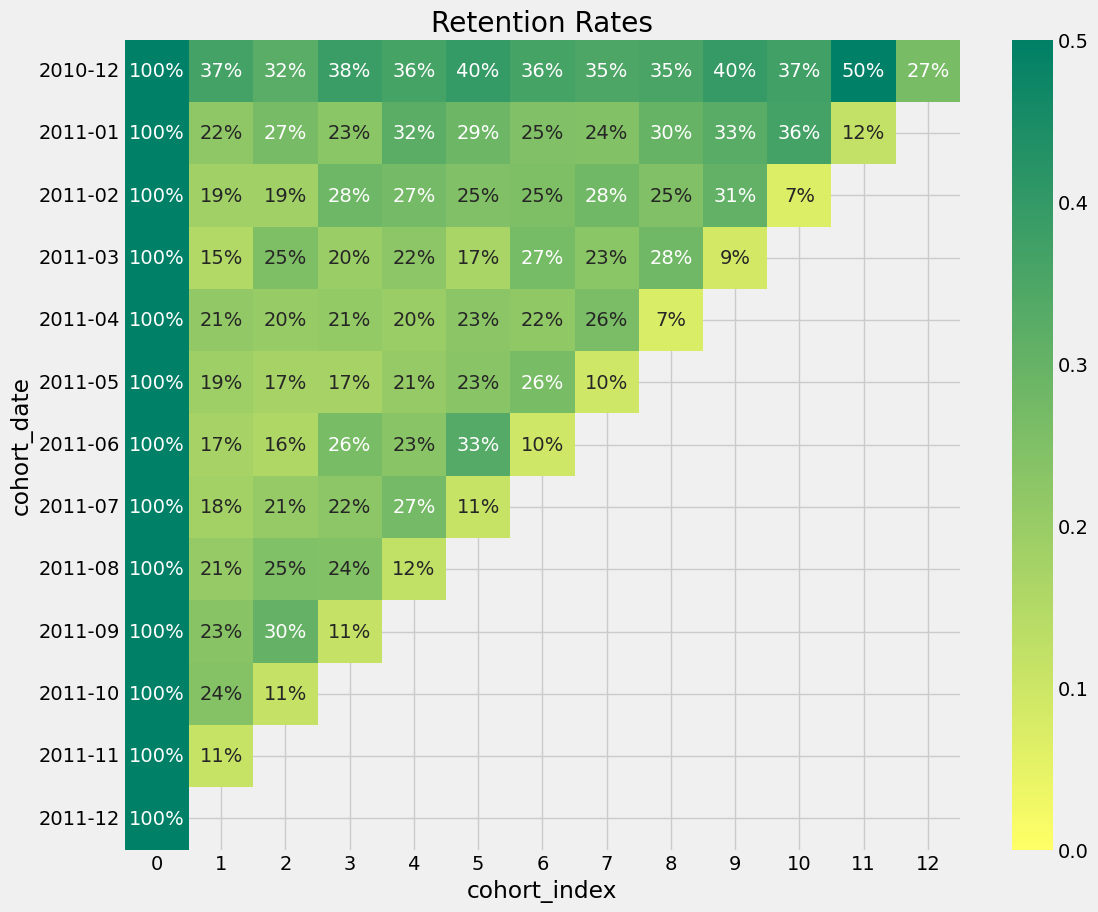

In [ ]:
#Retention heatmap visualization
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
plt.title('Retention Rates')

sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin= 0.0,
           vmax=0.5,
           cmap='summer_r')
plt.show()

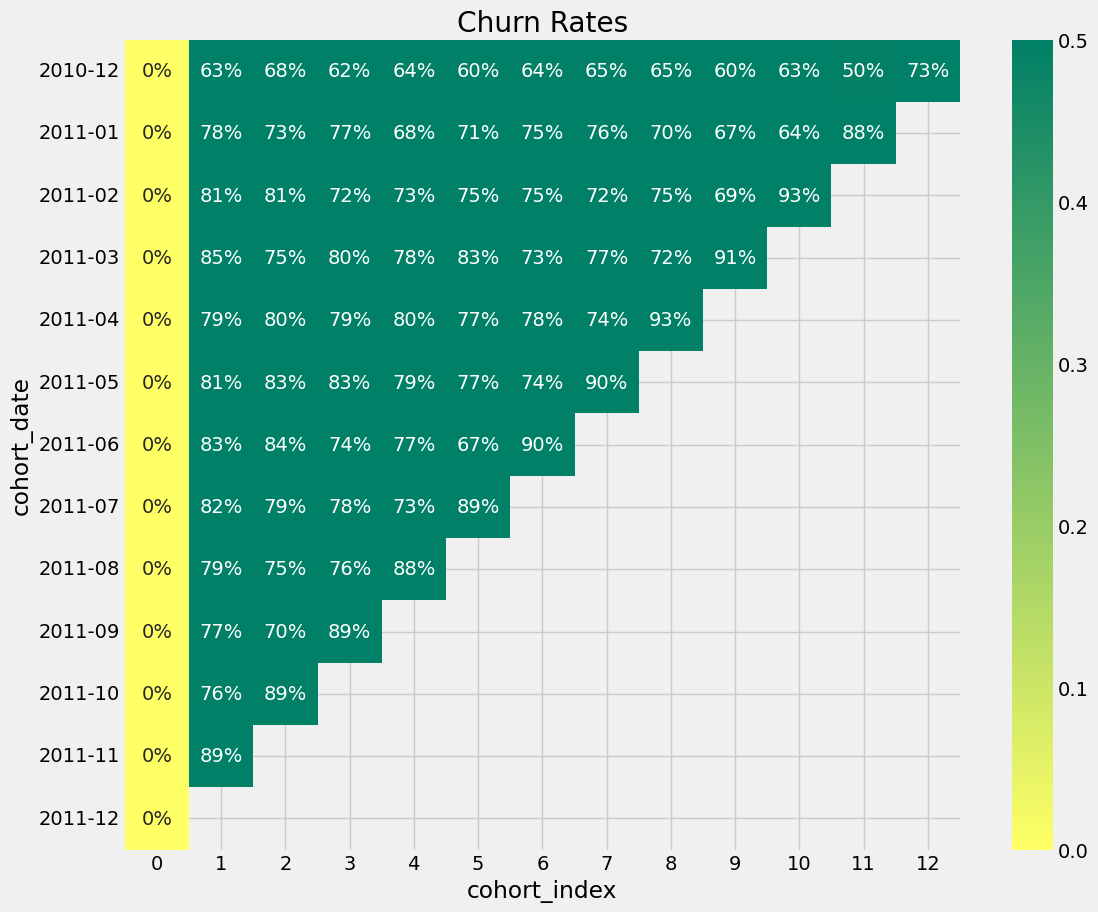

In [ ]:
#Churn heatmap visualization
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
plt.title('Churn Rates')

sns.heatmap(data = 1- retention,
           annot = True,
           fmt = '.0%',
           vmin= 0.0,
           vmax=0.5,
           cmap='summer_r')
plt.show()

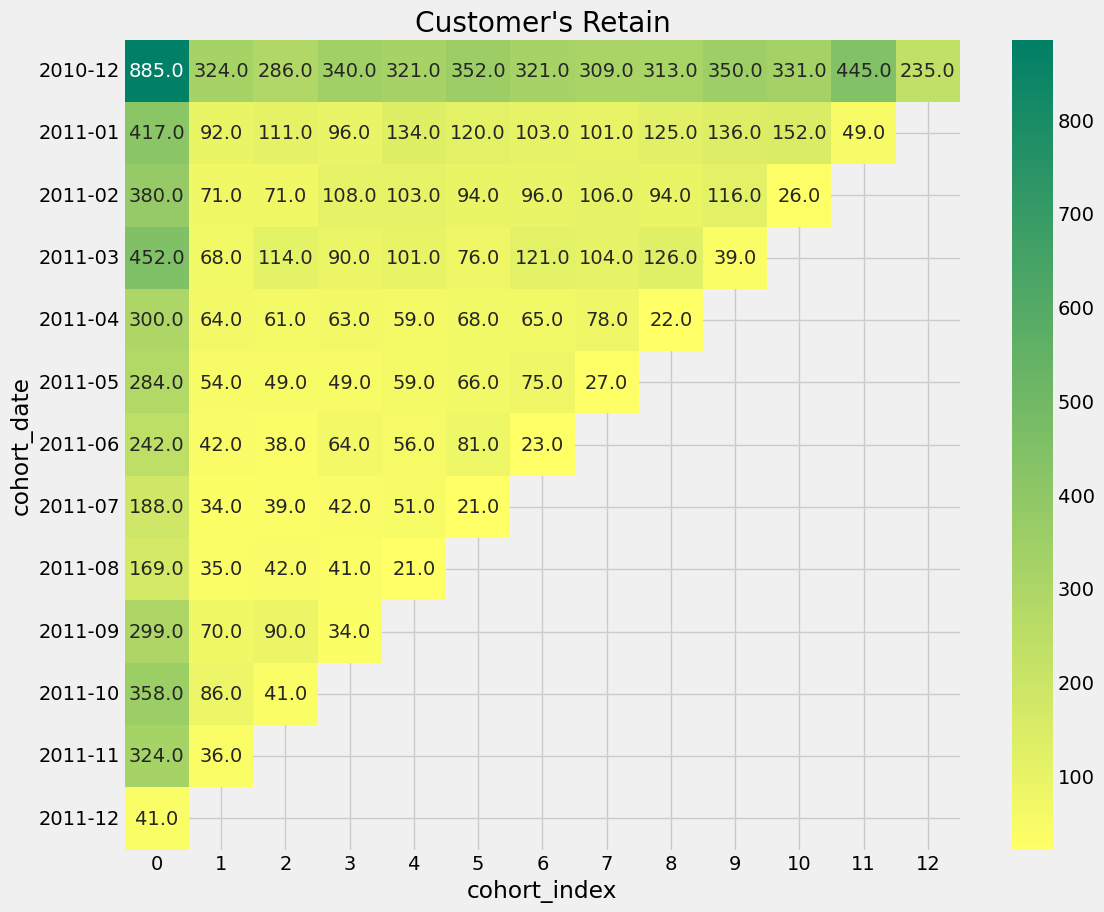

In [ ]:
#customer retain heatap visualization
plt.figure(figsize=(12,10))
plt.title("Customer's Retain")

sns.heatmap(data = cohort_counts,
           annot = True,
           fmt = '0',
           cmap='summer_r')
plt.show()

##### Revenue Cohort

In [ ]:
#Creating a columns for the each customer spend
df["Total_Spend"] = df["Quantity"]*df["UnitPrice"]

In [ ]:
#Monthly Cohort total spend sum, which also tell the revenue for a month
total_sum = df.groupby(["cohort_date", "cohort_index"], as_index=False)["Total_Spend"].sum()

In [ ]:
#Total spend sum in pivot table for better insight
revenue_cohort = total_sum.pivot( index="cohort_date",
                 columns = "cohort_index",
                 values = "Total_Spend"

)

In [89]:
revenue_cohort

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_date,,,,,,,,,,,,,
2010-12,572713.890,276237.69,233845.37,303119.39,204407.66,336627.50,314162.61,310783.92,331749.220,472813.64,456080.61,513803.59,185803.13
2011-01,293207.350,55149.91,63268.17,71587.40,81114.09,84583.78,70107.40,72689.71,72023.651,111803.90,123882.10,26464.82,NaN
2011-02,158142.070,29043.24,41134.38,48238.86,40147.91,34223.23,49706.63,62450.83,55380.060,64809.45,10600.22,NaN,NaN
2011-03,200069.960,30059.43,59057.51,42816.61,51657.33,40020.81,64919.49,71023.95,71265.830,12868.02,NaN,NaN,NaN
2011-04,122011.491,29452.82,25077.07,24311.47,26314.19,30206.30,28668.98,34228.61,6350.100,NaN,NaN,NaN,NaN
2011-05,124103.780,18682.76,20193.76,19162.17,27861.87,32976.60,33312.91,179251.53,NaN,NaN,NaN,NaN,NaN
2011-06,135742.950,14805.15,14155.40,30961.59,26754.54,42808.25,8227.35,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,74008.751,11789.67,15534.18,17551.47,19512.11,6072.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,79756.100,20962.93,35503.90,44541.76,15284.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Cohort Average Revenue

In [ ]:
#Average revenue in the cohort total spend
avg_revenue = revenue_cohort/cohort_counts

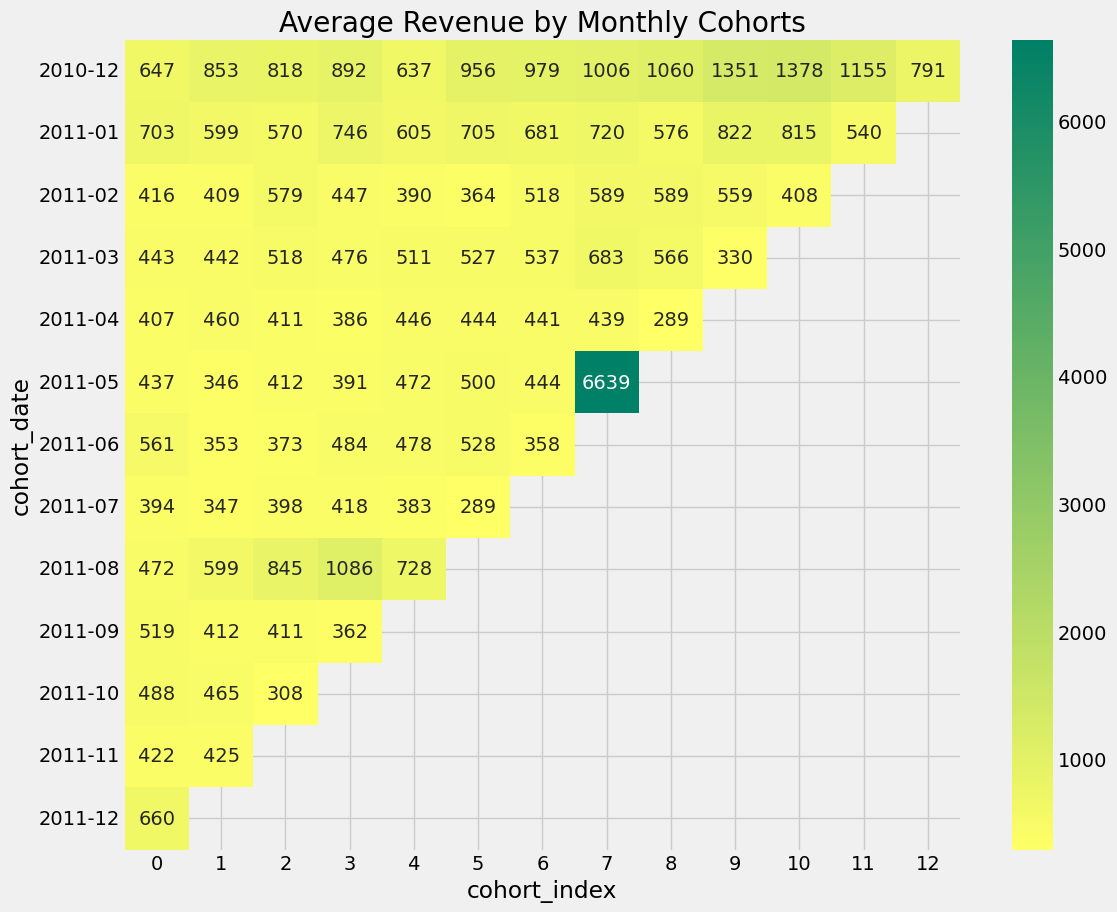

In [30]:
#plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
plt.title("Average Revenue by Monthly Cohorts")

sns.heatmap(data = avg_revenue,
           annot = True,
           fmt = '0.0f',
           cmap='summer_r')
plt.show()

In [31]:
avg_revenue

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_date,,,,,,,,,,,,,
2010-12,647.134339,852.585463,817.641154,891.527618,636.783988,956.328125,978.699720,1005.773204,1059.901661,1350.896114,1377.887039,1154.614809,790.651617
2011-01,703.135132,599.455543,569.983514,745.702083,605.329030,704.864833,680.654369,719.700099,576.189208,822.087500,815.013816,540.098367,NaN
2011-02,416.163342,409.059718,579.357465,446.656111,389.785534,364.076915,517.777396,589.158774,589.149574,558.702155,407.700769,NaN,NaN
2011-03,442.632655,442.050441,518.048333,475.740111,511.458713,526.589605,536.524711,682.922596,565.601825,329.949231,NaN,NaN,NaN
2011-04,406.704970,460.200312,411.099508,385.896349,446.003220,444.210294,441.061231,438.828333,288.640909,NaN,NaN,NaN,NaN
2011-05,436.985141,345.977037,412.117551,391.064694,472.235085,499.645455,444.172133,6638.945556,NaN,NaN,NaN,NaN,NaN
2011-06,560.921281,352.503571,372.510526,483.774844,477.759643,528.496914,357.710870,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,393.663569,346.755000,398.312308,417.892143,382.590392,289.150476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,471.929586,598.940857,845.330952,1086.384390,727.826667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Return Rate by Cohort Month

In [ ]:
#Fittering and storing the number of times that a customer purchase
df["return"] = df.groupby(df["CustomerID"])["InvoiceNo"].transform("nunique")

In [39]:
# Count how many invoices each customer made
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Customers with at least 2 invoices
repeat_customers = customer_orders[customer_orders >= 2].index


In [ ]:
#Fittering and storing customers that buy at least 2 times
df['IsRepeatBuyer'] = df['CustomerID'].isin(repeat_customers)


In [41]:
# For each CohortMonth, calculate:
# 1. Unique customers in the cohort
# 2. How many of them are repeat buyers

# First purchase date per customer (cohort month)
first_purchase = df.groupby('CustomerID')['InvoiceDate'].min().dt.to_period('M')
df['CohortMonth'] = df['CustomerID'].map(first_purchase)

# Total customers per cohort
cohort_total = df.groupby('CohortMonth')['CustomerID'].nunique()

# Repeat buyers per cohort
cohort_repeat = df[df['IsRepeatBuyer']].groupby('CohortMonth')['CustomerID'].nunique()

# Calculate return rate
return_rate = (cohort_repeat / cohort_total).fillna(0).round(3)


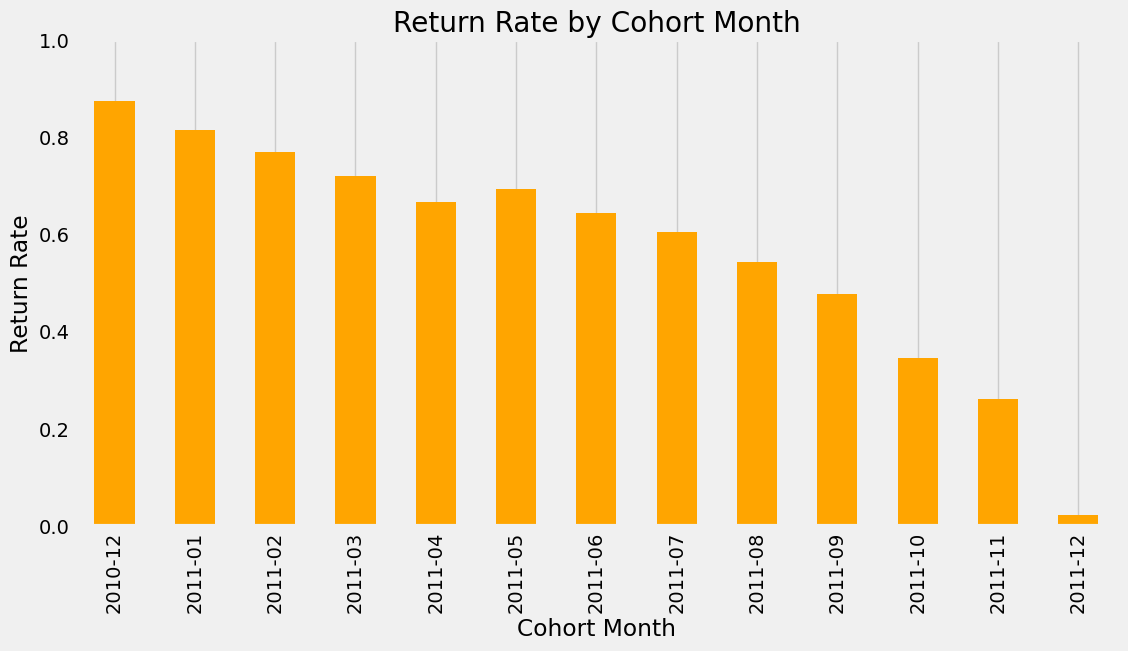

In [ ]:
#Plotting the return rate of whcih customers return to buy again
import matplotlib.pyplot as plt

return_rate.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Return Rate by Cohort Month')
plt.ylabel('Return Rate')
plt.xlabel('Cohort Month')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [90]:
return_rate

CohortMonth
2010-12    0.875
2011-01    0.815
2011-02    0.771
2011-03    0.721
2011-04    0.667
2011-05    0.694
2011-06    0.645
2011-07    0.606
2011-08    0.544
2011-09    0.478
2011-10    0.346
2011-11    0.262
2011-12    0.024
Freq: M, Name: CustomerID, dtype: float64

##### Time Between First and Second Purchases

In [96]:
# Sort the data by CustomerID and InvoiceDate
df_sorted = df.sort_values(by=['CustomerID', 'InvoiceDate'])

In [97]:
# Assign order number (1st, 2nd, etc.) for each customer's purchases, this count date times and rank it.
df_sorted['PurchaseRank'] = df_sorted.groupby('CustomerID')['InvoiceDate'].rank(method='first')

In [98]:
# First purchase
first_purchase = df_sorted[df_sorted['PurchaseRank'] == 1][['CustomerID', 'InvoiceDate']].rename(columns={'InvoiceDate': 'FirstPurchaseDate'})

# Second purchase
second_purchase = df_sorted[df_sorted['PurchaseRank'] == 2][['CustomerID', 'InvoiceDate']].rename(columns={'InvoiceDate': 'SecondPurchaseDate'})


In [93]:
first_purchase

,CustomerID,FirstPurchaseDate
61619,12346.0,2011-01-18 10:01:00
14938,12347.0,2010-12-07 14:57:00
34083,12348.0,2010-12-16 19:09:00
485502,12349.0,2011-11-21 09:51:00
80323,12350.0,2011-02-02 16:01:00
...,...,...
111045,18280.0,2011-03-07 09:52:00
222954,18281.0,2011-06-12 10:53:00
291854,18282.0,2011-08-05 13:35:00
46026,18283.0,2011-01-06 14:14:00


In [46]:
# Merge on CustomerID
purchase_gap = pd.merge(first_purchase, second_purchase, on='CustomerID', how='inner')

# Calculate days between first and second purchase
purchase_gap['DaysBetween'] = (purchase_gap['SecondPurchaseDate'] - purchase_gap['FirstPurchaseDate']).dt.days


In [102]:
purchase_gap["DaysBetween"].describe()

count    4267.000000
mean        1.841575
std        17.552125
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       309.000000
Name: DaysBetween, dtype: float64

In [48]:
purchase_gap[purchase_gap['DaysBetween'] > 0]["DaysBetween"].describe()


count     78.000000
mean     100.743590
std       83.517233
min        1.000000
25%       32.000000
50%       82.500000
75%      140.500000
max      309.000000
Name: DaysBetween, dtype: float64

In [49]:
# Summary stats
purchase_gap[~(purchase_gap['DaysBetween'] == 0)]


,CustomerID,FirstPurchaseDate,SecondPurchaseDate,DaysBetween
331,12755.0,2010-12-09 10:44:00,2011-03-04 12:42:00,85
374,12823.0,2011-02-16 12:15:00,2011-02-23 15:03:00,7
413,12875.0,2010-12-12 12:03:00,2011-07-19 15:30:00,219
426,12891.0,2011-02-20 11:28:00,2011-05-03 11:33:00,72
434,12908.0,2011-01-31 12:37:00,2011-06-16 15:39:00,136
...,...,...,...,...
4032,17949.0,2010-12-03 13:12:00,2011-01-06 10:20:00,33
4080,18017.0,2011-02-02 13:57:00,2011-06-23 15:48:00,141
4121,18080.0,2011-04-11 10:10:00,2011-11-21 08:02:00,223
4126,18087.0,2011-02-22 10:43:00,2011-09-02 15:12:00,192


<Axes: ylabel='DaysBetween'>

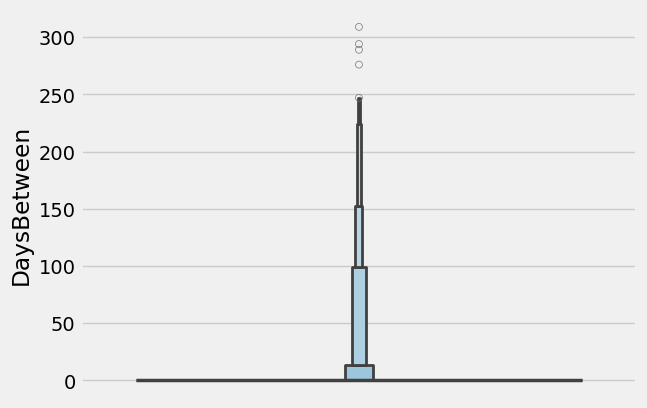

In [116]:
sns.boxenplot(purchase_gap["DaysBetween"])

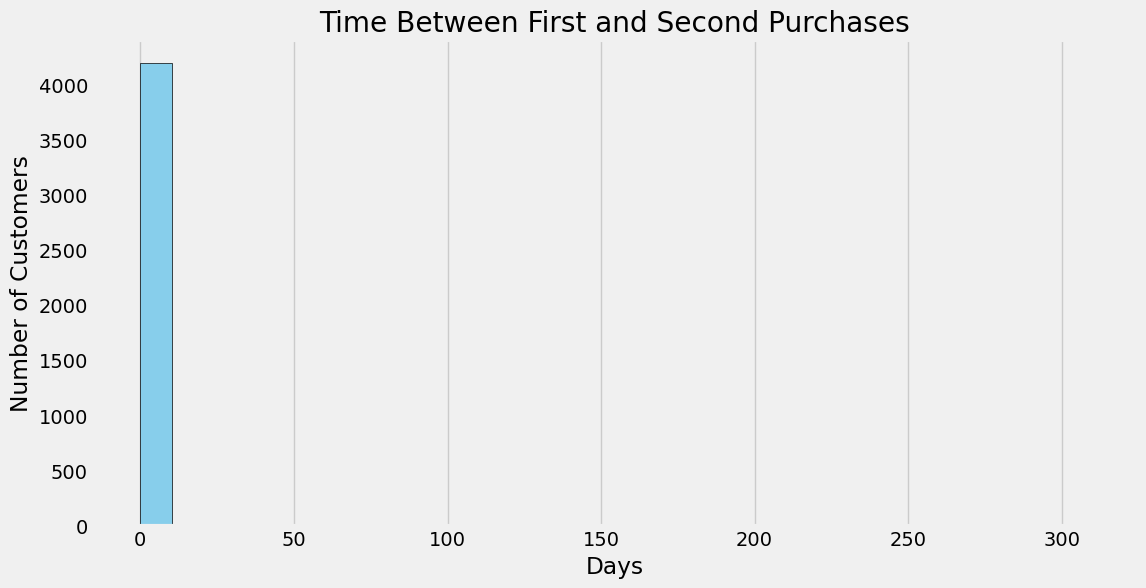

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(purchase_gap['DaysBetween'], bins=30, color='skyblue', edgecolor='black')
plt.title('Time Between First and Second Purchases')
plt.xlabel('Days')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


#### Average Days Between Purchases by Cohort Month

In [ ]:
purchase_gap['CohortMonth'] = purchase_gap['FirstPurchaseDate'].dt.to_period('M')

In [52]:
avg_return_time_by_cohort = purchase_gap.groupby('CohortMonth')['DaysBetween'].mean().round(1)


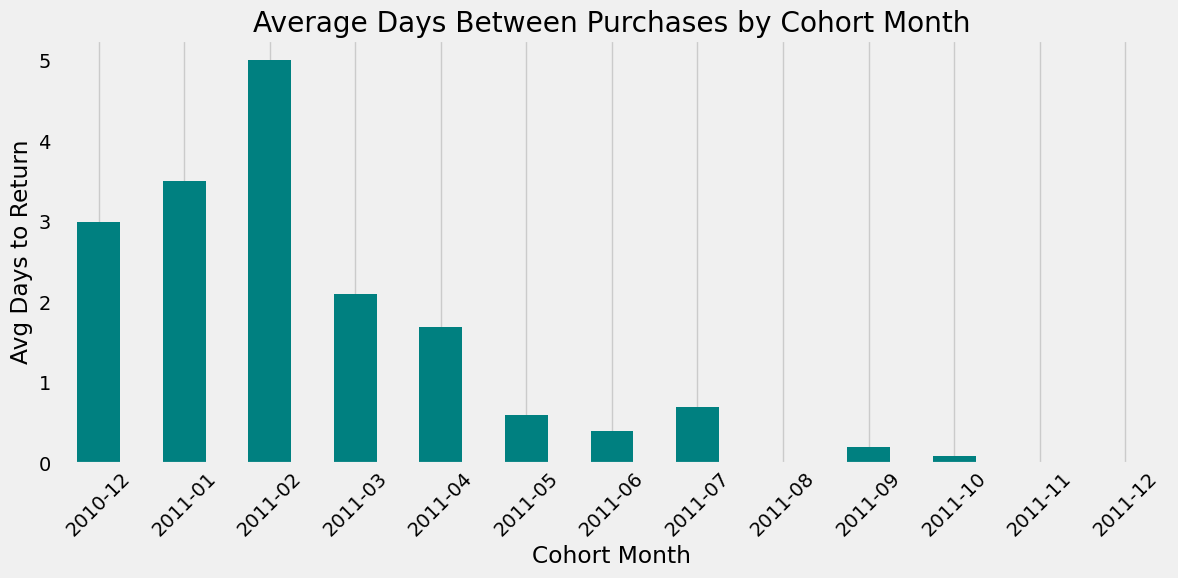

In [53]:
import matplotlib.pyplot as plt

avg_return_time_by_cohort.plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Average Days Between Purchases by Cohort Month')
plt.xlabel('Cohort Month')
plt.ylabel('Avg Days to Return')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [54]:
avg_return_time_by_cohort

CohortMonth
2010-12    3.0
2011-01    3.5
2011-02    5.0
2011-03    2.1
2011-04    1.7
2011-05    0.6
2011-06    0.4
2011-07    0.7
2011-08    0.0
2011-09    0.2
2011-10    0.1
2011-11    0.0
2011-12    0.0
Freq: M, Name: DaysBetween, dtype: float64

In [55]:
# Get country for each customer from original dataset
customer_country = df.groupby('CustomerID')['Country'].first().reset_index()

# Merge into purchase_gap
purchase_gap = purchase_gap.merge(customer_country, on='CustomerID', how='left')


In [56]:
purchase_gap

,CustomerID,FirstPurchaseDate,SecondPurchaseDate,DaysBetween,CohortMonth,Country
0,12347.0,2010-12-07 14:57:00,2010-12-07 14:57:00,0,2010-12,Iceland
1,12348.0,2010-12-16 19:09:00,2010-12-16 19:09:00,0,2010-12,Finland
2,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0,2011-11,Italy
3,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,2011-02,Norway
4,12352.0,2011-02-16 12:33:00,2011-02-16 12:33:00,0,2011-02,Norway
...,...,...,...,...,...,...
4262,18280.0,2011-03-07 09:52:00,2011-03-07 09:52:00,0,2011-03,United Kingdom
4263,18281.0,2011-06-12 10:53:00,2011-06-12 10:53:00,0,2011-06,United Kingdom
4264,18282.0,2011-08-05 13:35:00,2011-08-05 13:35:00,0,2011-08,United Kingdom
4265,18283.0,2011-01-06 14:14:00,2011-01-06 14:14:00,0,2011-01,United Kingdom


In [57]:
# Only keep customers who returned at least once
returned_customers = purchase_gap[purchase_gap['DaysBetween'] > 0]

# 1. Average days to return
avg_days_by_country = returned_customers.groupby('Country')['DaysBetween'].mean().sort_values(ascending=False)

# 2. Return rate per country
total_customers = purchase_gap.groupby('Country')['CustomerID'].nunique()
repeat_customers = returned_customers.groupby('Country')['CustomerID'].nunique()
return_rate_by_country = (repeat_customers / total_customers).fillna(0).sort_values(ascending=False)


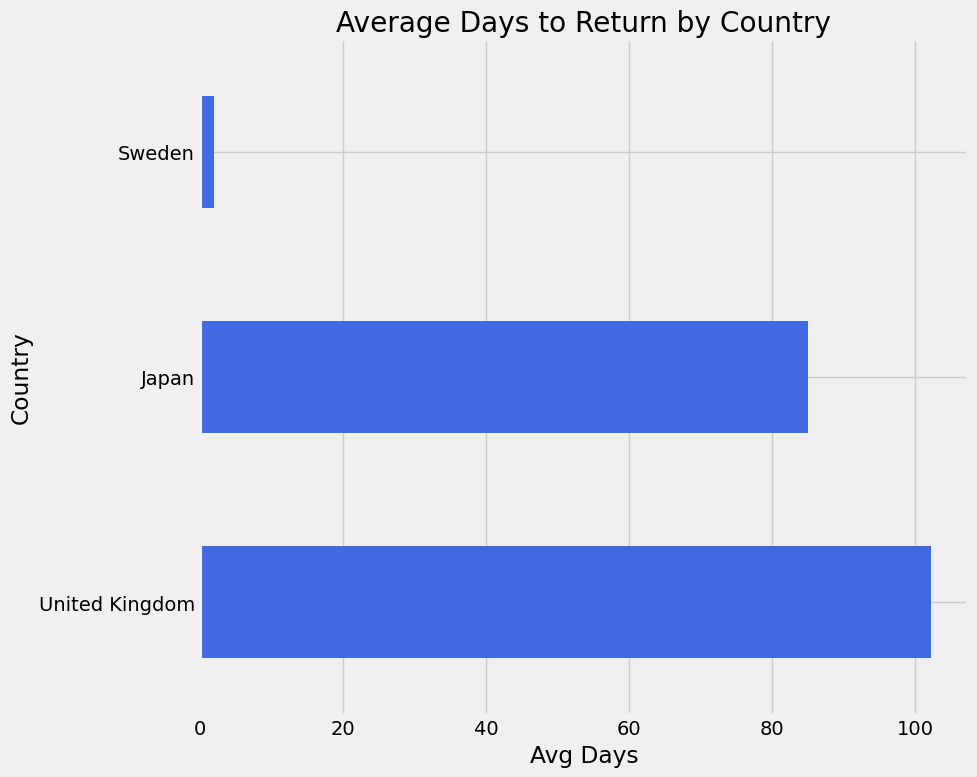

In [58]:
avg_days_by_country.plot(kind='barh', figsize=(10, 8), color='royalblue')
plt.title('Average Days to Return by Country')
plt.xlabel('Avg Days')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


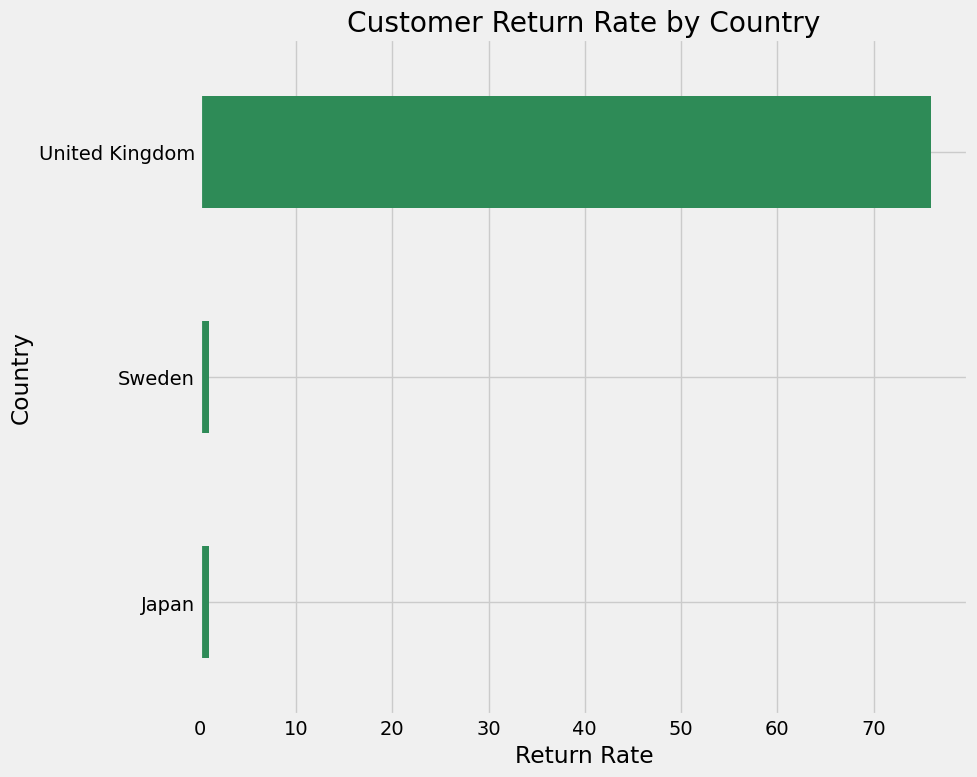

In [59]:
repeat_customers.plot(kind='barh', figsize=(10, 8), color='seagreen')
plt.title('Customer Return Rate by Country')
plt.xlabel('Return Rate')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


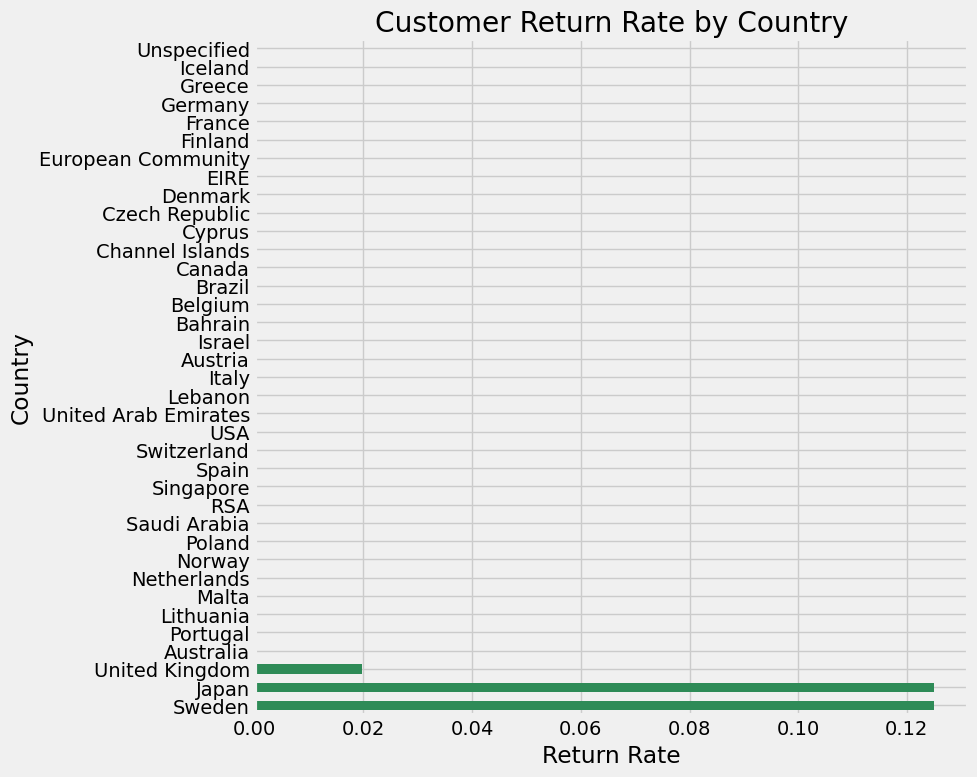

In [60]:
return_rate_by_country.plot(kind='barh', figsize=(10, 8), color='seagreen')
plt.title('Customer Return Rate by Country')
plt.xlabel('Return Rate')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


#### Customer Lifetime Value (CLV)

In [61]:
df['OrderMonth'] = df['InvoiceDate'].dt.to_period('M')

In [62]:
def get_cohort_index(row):
    return (row['OrderMonth'].year - row['CohortMonth'].year) * 12 + \
           (row['OrderMonth'].month - row['CohortMonth'].month) + 1

df["cohortIndex"] = df.apply(get_cohort_index, axis=1)


In [69]:
cohort_data_2 = df.groupby(['CohortMonth', 'cohortIndex']).agg({
    'Total_Spend': 'sum',
    'CustomerID': 'nunique'  # unique active customers per cohort
}).reset_index()

# Rename
cohort_data_2.rename(columns={'CustomerID': 'TotalCustomers'}, inplace=True)


In [70]:
cohort_data_2

,CohortMonth,cohortIndex,Total_Spend,TotalCustomers
0,2010-12,1,572713.89,885
1,2010-12,2,276237.69,324
2,2010-12,3,233845.37,286
3,2010-12,4,303119.39,340
4,2010-12,5,204407.66,321
...,...,...,...,...
86,2011-10,2,40026.68,86
87,2011-10,3,12621.10,41
88,2011-11,1,136592.12,324
89,2011-11,2,15284.61,36


In [71]:
cohort_data

,cohort_date,cohort_index,TotalCustomers
0,2010-12,0,885
1,2010-12,1,324
2,2010-12,2,286
3,2010-12,3,340
4,2010-12,4,321
...,...,...,...
86,2011-10,1,86
87,2011-10,2,41
88,2011-11,0,324
89,2011-11,1,36


In [72]:
cohort_data_2['CLV'] = cohort_data_2['Total_Spend'] / cohort_data_2['TotalCustomers']

In [73]:
cohort_data_2

,CohortMonth,cohortIndex,Total_Spend,TotalCustomers,CLV
0,2010-12,1,572713.89,885,647.134339
1,2010-12,2,276237.69,324,852.585463
2,2010-12,3,233845.37,286,817.641154
3,2010-12,4,303119.39,340,891.527618
4,2010-12,5,204407.66,321,636.783988
...,...,...,...,...,...
86,2011-10,2,40026.68,86,465.426512
87,2011-10,3,12621.10,41,307.831707
88,2011-11,1,136592.12,324,421.580617
89,2011-11,2,15284.61,36,424.572500


In [74]:
clv_matrix = cohort_data_2.pivot(index='CohortMonth', columns='cohortIndex', values='CLV')

In [75]:
clv_matrix

cohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,647.134339,852.585463,817.641154,891.527618,636.783988,956.328125,978.699720,1005.773204,1059.901661,1350.896114,1377.887039,1154.614809,790.651617
2011-01,703.135132,599.455543,569.983514,745.702083,605.329030,704.864833,680.654369,719.700099,576.189208,822.087500,815.013816,540.098367,NaN
2011-02,416.163342,409.059718,579.357465,446.656111,389.785534,364.076915,517.777396,589.158774,589.149574,558.702155,407.700769,NaN,NaN
2011-03,442.632655,442.050441,518.048333,475.740111,511.458713,526.589605,536.524711,682.922596,565.601825,329.949231,NaN,NaN,NaN
2011-04,406.704970,460.200312,411.099508,385.896349,446.003220,444.210294,441.061231,438.828333,288.640909,NaN,NaN,NaN,NaN
2011-05,436.985141,345.977037,412.117551,391.064694,472.235085,499.645455,444.172133,6638.945556,NaN,NaN,NaN,NaN,NaN
2011-06,560.921281,352.503571,372.510526,483.774844,477.759643,528.496914,357.710870,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,393.663569,346.755000,398.312308,417.892143,382.590392,289.150476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,471.929586,598.940857,845.330952,1086.384390,727.826667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
avg_revenue

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_date,,,,,,,,,,,,,
2010-12,647.134339,852.585463,817.641154,891.527618,636.783988,956.328125,978.699720,1005.773204,1059.901661,1350.896114,1377.887039,1154.614809,790.651617
2011-01,703.135132,599.455543,569.983514,745.702083,605.329030,704.864833,680.654369,719.700099,576.189208,822.087500,815.013816,540.098367,NaN
2011-02,416.163342,409.059718,579.357465,446.656111,389.785534,364.076915,517.777396,589.158774,589.149574,558.702155,407.700769,NaN,NaN
2011-03,442.632655,442.050441,518.048333,475.740111,511.458713,526.589605,536.524711,682.922596,565.601825,329.949231,NaN,NaN,NaN
2011-04,406.704970,460.200312,411.099508,385.896349,446.003220,444.210294,441.061231,438.828333,288.640909,NaN,NaN,NaN,NaN
2011-05,436.985141,345.977037,412.117551,391.064694,472.235085,499.645455,444.172133,6638.945556,NaN,NaN,NaN,NaN,NaN
2011-06,560.921281,352.503571,372.510526,483.774844,477.759643,528.496914,357.710870,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,393.663569,346.755000,398.312308,417.892143,382.590392,289.150476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,471.929586,598.940857,845.330952,1086.384390,727.826667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


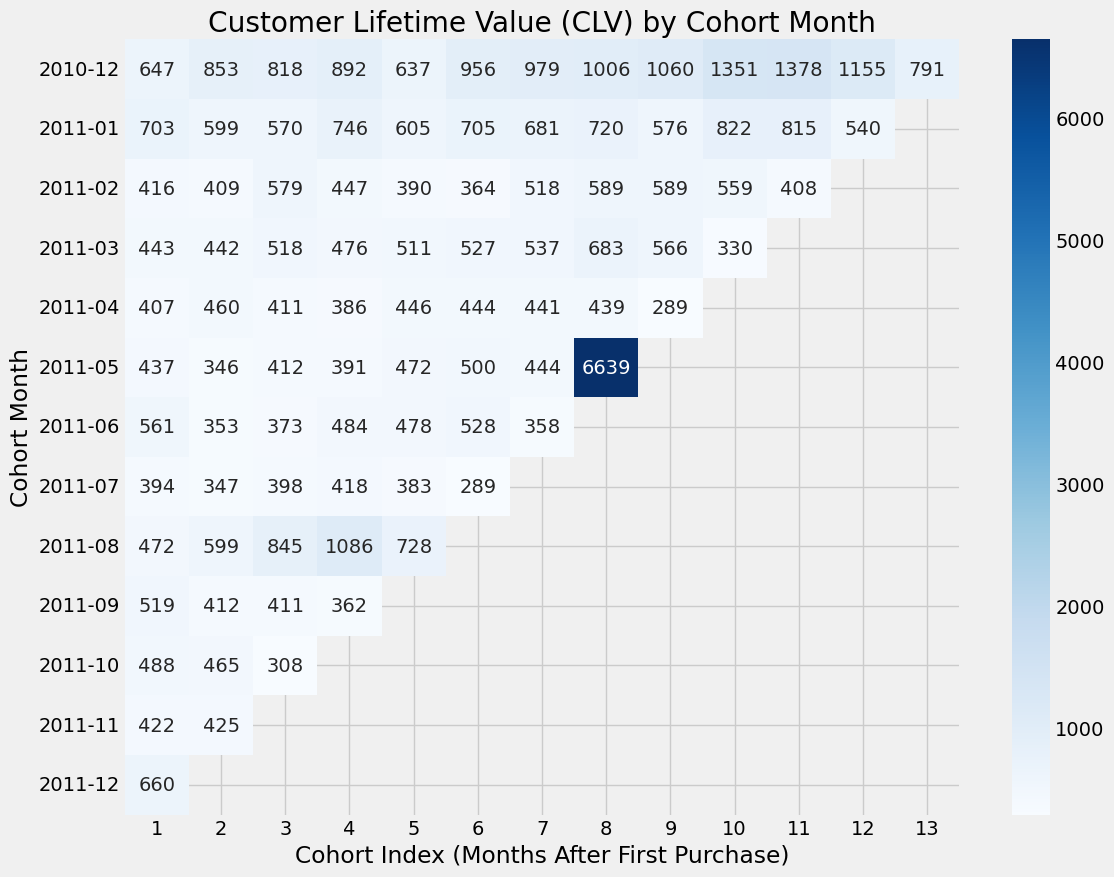

In [83]:
plt.figure(figsize=(12, 9))
sns.heatmap(clv_matrix, annot=True, fmt=".0f", cmap="Blues")
plt.title("Customer Lifetime Value (CLV) by Cohort Month")
plt.xlabel("Cohort Index (Months After First Purchase)")
plt.ylabel("Cohort Month")
plt.tight_layout()
plt.show()


In [78]:
first_purchase

,CustomerID,FirstPurchaseDate
61619,12346.0,2011-01-18 10:01:00
14938,12347.0,2010-12-07 14:57:00
34083,12348.0,2010-12-16 19:09:00
485502,12349.0,2011-11-21 09:51:00
80323,12350.0,2011-02-02 16:01:00
...,...,...
111045,18280.0,2011-03-07 09:52:00
222954,18281.0,2011-06-12 10:53:00
291854,18282.0,2011-08-05 13:35:00
46026,18283.0,2011-01-06 14:14:00


In [79]:
second_purchase

,CustomerID,SecondPurchaseDate
14939,12347.0,2010-12-07 14:57:00
34084,12348.0,2010-12-16 19:09:00
485503,12349.0,2011-11-21 09:51:00
80324,12350.0,2011-02-02 16:01:00
91818,12352.0,2011-02-16 12:33:00
...,...,...
111046,18280.0,2011-03-07 09:52:00
222955,18281.0,2011-06-12 10:53:00
291855,18282.0,2011-08-05 13:35:00
46027,18283.0,2011-01-06 14:14:00


In [80]:
purchase_gap

,CustomerID,FirstPurchaseDate,SecondPurchaseDate,DaysBetween,CohortMonth,Country
0,12347.0,2010-12-07 14:57:00,2010-12-07 14:57:00,0,2010-12,Iceland
1,12348.0,2010-12-16 19:09:00,2010-12-16 19:09:00,0,2010-12,Finland
2,12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0,2011-11,Italy
3,12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,2011-02,Norway
4,12352.0,2011-02-16 12:33:00,2011-02-16 12:33:00,0,2011-02,Norway
...,...,...,...,...,...,...
4262,18280.0,2011-03-07 09:52:00,2011-03-07 09:52:00,0,2011-03,United Kingdom
4263,18281.0,2011-06-12 10:53:00,2011-06-12 10:53:00,0,2011-06,United Kingdom
4264,18282.0,2011-08-05 13:35:00,2011-08-05 13:35:00,0,2011-08,United Kingdom
4265,18283.0,2011-01-06 14:14:00,2011-01-06 14:14:00,0,2011-01,United Kingdom


In [81]:
df_sorted[df_sorted["CustomerID"] == 12347.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,cohort_date,cohort_index,Total_Spend,return,IsRepeatBuyer,CohortMonth,PurchaseRank
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12,2010-12,0,25.20,7,True,2010-12,1.0
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12,2010-12,0,17.00,7,True,2010-12,2.0
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12,2010-12,0,39.00,7,True,2010-12,3.0
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,2010-12,2010-12,0,23.40,7,True,2010-12,4.0
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12,2010-12,0,15.00,7,True,2010-12,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,2011-12-07 15:52:00,0.85,12347.0,Iceland,2011-12,2010-12,12,8.50,7,True,2010-12,178.0
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,2011-12-07 15:52:00,1.95,12347.0,Iceland,2011-12,2010-12,12,23.40,7,True,2010-12,179.0
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,2011-12-07 15:52:00,0.83,12347.0,Iceland,2011-12,2010-12,12,13.28,7,True,2010-12,180.0
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,2011-12-07 15:52:00,0.42,12347.0,Iceland,2011-12,2010-12,12,8.40,7,True,2010-12,181.0


In [82]:
df_sorted

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,cohort_date,cohort_index,Total_Spend,return,IsRepeatBuyer,CohortMonth,PurchaseRank
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01,2011-01,0,77183.60,1,False,2011-01,1.0
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12,2010-12,0,25.20,7,True,2010-12,1.0
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12,2010-12,0,17.00,7,True,2010-12,2.0
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12,2010-12,0,39.00,7,True,2010-12,3.0
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,2010-12,2010-12,0,23.40,7,True,2010-12,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392752,570715,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287.0,United Kingdom,2011-10,2011-05,5,5.04,3,True,2011-05,66.0
392753,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287.0,United Kingdom,2011-10,2011-05,5,25.20,3,True,2011-05,67.0
423939,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom,2011-10,2011-05,5,45.00,3,True,2011-05,68.0
423940,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287.0,United Kingdom,2011-10,2011-05,5,18.72,3,True,2011-05,69.0
